# DQN analysis

In [44]:
import os
import ast
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%reload_ext autoreload
%autoreload 2

In [2]:
path_1 = r"/home/docker/car_racing/models/DQN_1"

In [3]:
file_1 = os.path.join(path_1, "2024-03-06 11-58-40.670405_DQN_training_results.json")
file_2 = os.path.join(path_1, "2024-03-06 14-18-57.083085_DQN_training_results.json")
file_3 = os.path.join(path_1, "2024-03-09 18-52-18.074780_DQN_training_results.json")

with open(file_1, "r") as f:
    data_1 = json.load(f)
with open(file_2, "r") as f:
    data_2 = json.load(f)
with open(file_3, "r") as f:
    data_3 = json.load(f)

In [2]:
def convert_data(data):
    return {key: ast.literal_eval(value) for key, value in data.items()}


In [4]:

data_1 = convert_data(data_1)
data_2 = convert_data(data_2)
data_3 = convert_data(data_3)

In [5]:
df1 = pd.DataFrame(data_1)
df2 = pd.DataFrame(data_2)
df3 = pd.DataFrame(data_3)

In [3]:
keep_cols = ['epsilon', 'time_frame_counter',
    'episode_reward', 'average_rewards', 'loss_evolution']

In [8]:
df1 = df1[keep_cols]
df2 = df2[keep_cols]
df3 = df3[keep_cols]

Params:
- DQN
- Hidden layers 256,
- learning rate 0.00025
- gamma 0.99
- epsilon 1.0
- epsilon decay 0.995
- batch size 64
- network update frequency 1
- sync freq 100
- convolutional network [[(4, 32, (8, 8), (4, 4)), (32, 64, (4, 4), (2, 2)), (64, 256, (2, 2), (1, 1))]]
- gas 1.5

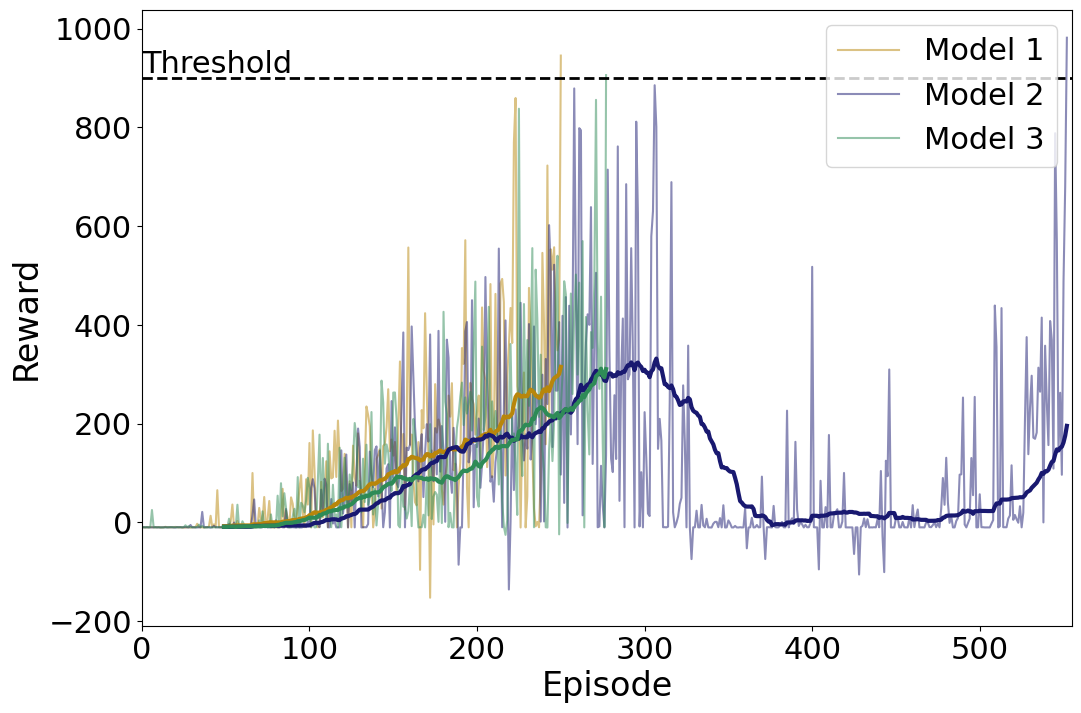

In [73]:
plt.figure(figsize=(12, 8))
plt.plot(df1['episode_reward'], label='Model 1', color='darkgoldenrod', alpha=0.5)
plt.plot(df2['episode_reward'], label='Model 2', color='midnightblue', alpha=0.5)
plt.plot(df3['episode_reward'], label='Model 3', color='seagreen', alpha=0.5)
plt.plot(df1['episode_reward'].rolling(window=50).mean(), color='darkgoldenrod', lw=3)
plt.plot(df2['episode_reward'].rolling(window=50).mean(), color='midnightblue', lw=3)
plt.plot(df3['episode_reward'].rolling(window=50).mean(), color='seagreen', lw=3)
plt.xlabel('Episode', fontsize=24)
plt.ylabel('Reward', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22, loc='upper right')
plt.axhline(y=900, color='black', linestyle='--', lw=2)
plt.text(0, 910, 'Threshold', fontsize=22, color='black')
plt.xlim(0, 555)
plt.show()

Params:
- DQN
- Hidden layers 32,
- learning rate 0.00025
- gamma 0.99
- epsilon 1.0
- epsilon decay 0.995
- batch size 64
- network update frequency 1
- sync freq 100
- convolutional network [[(4, 32, (8, 8), (4, 4)), (32, 64, (4, 4), (2, 2)), (64, 32, (2, 2), (1, 1))]]
- gas 1.5

In [38]:
path_2 = r"/home/docker/car_racing/models/DQN_2"

In [43]:
file_4 = os.path.join(path_2, "2024-03-11 115837.233272_DQN_training_results.json")
file_5 = os.path.join(path_2, "2024-03-11 184900.717696_DQN_training_results.json")

with open(file_4, "r") as f:
    data_4 = json.load(f)
with open(file_5, "r") as f:
    data_5 = json.load(f)

In [44]:
data_4 = convert_data(data_4)
data_5 = convert_data(data_5)
df4 = pd.DataFrame(data_4)
df5 = pd.DataFrame(data_5)

In [45]:
df4 = df4[keep_cols]
df5 = df5[keep_cols]

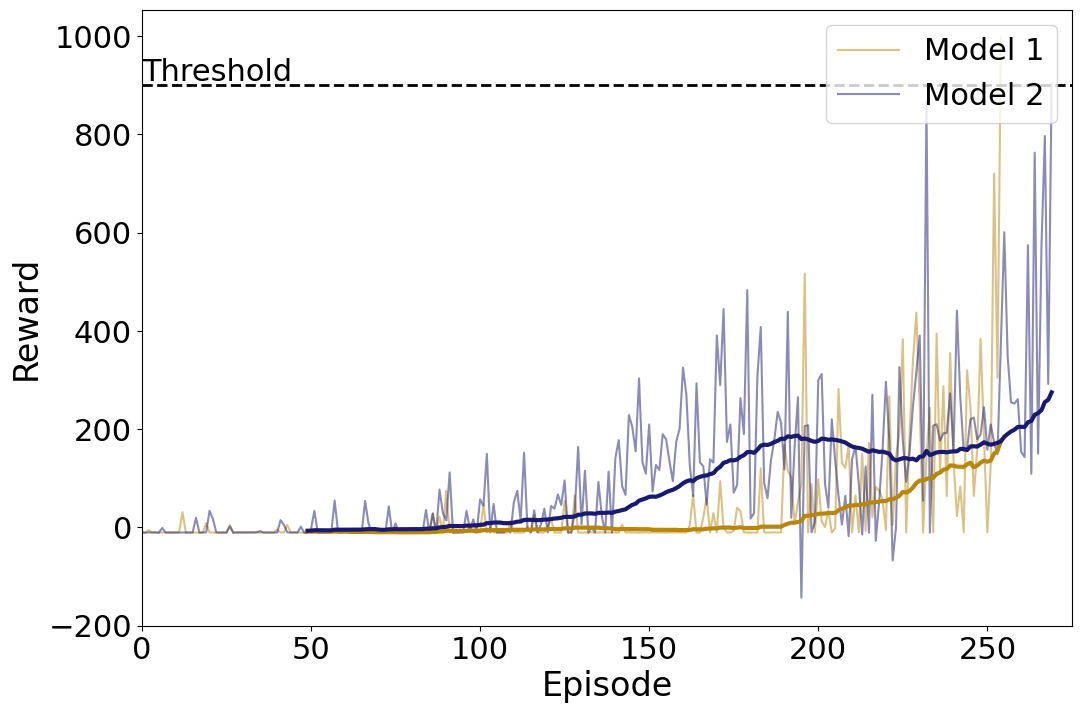

In [75]:
plt.figure(figsize=(12, 8))
plt.plot(df4['episode_reward'], label='Model 1', color='darkgoldenrod', alpha=0.5)
plt.plot(df5['episode_reward'], label='Model 2', color='midnightblue', alpha=0.5)
plt.plot(df4['episode_reward'].rolling(window=50).mean(), color='darkgoldenrod', lw=3)
plt.plot(df5['episode_reward'].rolling(window=50).mean(), color='midnightblue', lw=3)
plt.xlabel('Episode', fontsize=24)
plt.ylabel('Reward', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22, loc='upper right')
plt.axhline(y=900, color='black', linestyle='--', lw=2)
plt.text(0, 910, 'Threshold', fontsize=22, color='black')
plt.xlim(0, 275)

plt.show()

# Influence of learning rate

Params:
- DQN
- Hidden layers 32,
- learning rate 0.01, 0.001, 0.0001, 0.00001
- gamma 0.99
- epsilon 1.0
- epsilon decay 0.995
- batch size 64
- network update frequency 1
- sync freq 100
- convolutional network [[(4, 32, (8, 8), (4, 4)), (32, 64, (4, 4), (2, 2)), (64, 32, (2, 2), (1, 1))]]
- gas 4

In [11]:
path_3 = r"/home/docker/car_racing/models/DQN_1" # LR = 0.00001
path_4 = r"/home/docker/car_racing/models/DQN_2" # LR = 0.0001
path_5 = r"/home/docker/car_racing/models/DQN_3" # LR = 0.001
path_6 = r"/home/docker/car_racing/models/DQN_4" # LR = 0.01

In [12]:
file_lr00001 = os.path.join(path_3, "2024-03-29 190838.865500_DQN_training_results.json")
file_lr0001 = os.path.join(path_4, "2024-03-30 060915.321647_DQN_training_results.json")
file_lr001 = os.path.join(path_5, "2024-03-30 095139.350269_DQN_training_results.json")
file_lr01 = os.path.join(path_6, "2024-03-30 144439.021424_DQN_training_results.json")

with open(file_lr00001, "r") as f:
    data_lr00001 = json.load(f)
with open(file_lr0001, "r") as f:
    data_lr0001 = json.load(f)
with open(file_lr001, "r") as f:
    data_lr001 = json.load(f)
with open(file_lr01, "r") as f:
    data_lr01 = json.load(f)

In [13]:
data_lr00001 = convert_data(data_lr00001)
df_lr00001 = pd.DataFrame(data_lr00001)

data_lr0001 = convert_data(data_lr0001)
df_lr0001 = pd.DataFrame(data_lr0001)

data_lr001 = convert_data(data_lr001)
df_lr001 = pd.DataFrame(data_lr001)

data_lr01 = convert_data(data_lr01)
df_lr01 = pd.DataFrame(data_lr01)

In [14]:
df_lr00001 = df_lr00001[keep_cols]
df_lr0001 = df_lr0001[keep_cols]
df_lr001 = df_lr001[keep_cols]
df_lr01 = df_lr01[keep_cols]

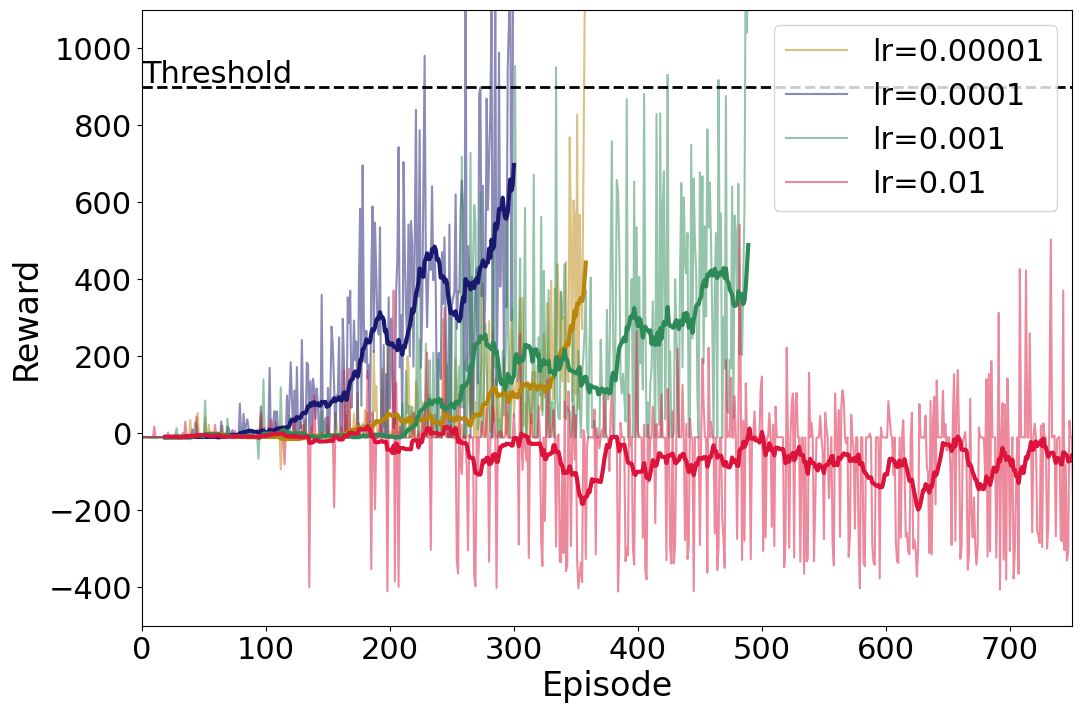

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(df_lr00001['episode_reward'], label='lr=0.00001', color='darkgoldenrod', alpha=0.5)
plt.plot(df_lr0001['episode_reward'], label='lr=0.0001', color='midnightblue', alpha=0.5)
plt.plot(df_lr001['episode_reward'], label='lr=0.001', color='seagreen', alpha=0.5)
plt.plot(df_lr01['episode_reward'], label='lr=0.01', color='crimson', alpha=0.5)

plt.plot(df_lr00001['episode_reward'].rolling(window=20).mean(), color='darkgoldenrod', lw=3)
plt.plot(df_lr0001['episode_reward'].rolling(window=20).mean(), color='midnightblue', lw=3)
plt.plot(df_lr001['episode_reward'].rolling(window=20).mean(), color='seagreen', lw=3)
plt.plot(df_lr01['episode_reward'].rolling(window=20).mean(), color='crimson', lw=3)

plt.xlabel('Episode', fontsize=24)
plt.ylabel('Reward', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22, loc='upper right')
plt.axhline(y=900, color='black', linestyle='--', lw=2)
plt.text(0, 910, 'Threshold', fontsize=22, color='black')
plt.xlim(0, 750)
plt.ylim(-500, 1100)

plt.show()

In [48]:
df_lr00001.describe()

,epsilon,time_frame_counter,episode_reward,average_rewards,loss_evolution
count,359.000000,359.000000,359.000000,359.000000,359.000000
mean,0.464969,110.473538,58.399725,20.561555,2.742282
std,0.235735,57.801227,149.539532,41.917933,1.714265
min,0.166212,11.000000,-94.130120,-11.823944,0.961925
25%,0.260315,51.000000,-10.500000,-8.430043,1.238037
50%,0.407691,138.000000,-10.099010,-4.442451,2.329827
75%,0.638509,151.000000,53.048999,37.133218,3.836478
max,1.000000,191.000000,1217.633452,191.162001,9.223064


In [49]:
df_lr0001.describe()

,epsilon,time_frame_counter,episode_reward,average_rewards,loss_evolution
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,0.517488,131.229236,193.894302,105.940629,3.720769
std,0.221663,67.883213,285.930598,140.507531,2.424462
min,0.222292,11.000000,-12.000000,-10.720320,0.989694
25%,0.323738,65.000000,-10.333333,-8.663444,1.774427
50%,0.471479,151.000000,50.111940,27.027060,2.814372
75%,0.686643,191.000000,335.679739,213.475288,5.202304
max,1.000000,191.000000,1758.590909,458.358876,10.089911


In [50]:
df_lr001.describe()

,epsilon,time_frame_counter,episode_reward,average_rewards,loss_evolution
count,490.000000,490.000000,490.000000,490.000000,490.000000
mean,0.373157,121.483673,127.941435,85.707885,34.927015
std,0.252928,61.492187,231.840440,105.719667,379.419367
min,0.086196,15.000000,-66.520548,-10.914948,0.847061
25%,0.159080,66.000000,-10.456387,-6.012851,1.530538
50%,0.293592,151.000000,-4.702435,19.521918,4.780506
75%,0.541842,178.000000,177.854647,180.042804,11.301604
max,1.000000,191.000000,1408.573826,357.824644,7038.633300


In [51]:
df_lr01.describe()

,epsilon,time_frame_counter,episode_reward,average_rewards,loss_evolution
count,767.000000,767.000000,767.000000,767.000000,7.670000e+02
mean,0.255177,86.607562,-52.175955,-48.515671,7.647127e+09
std,0.256154,49.107955,143.816067,32.493207,1.998511e+11
min,0.021502,11.000000,-411.186207,-107.426159,9.121742e-01
25%,0.056151,44.000000,-12.000000,-77.312449,5.584664e+00
50%,0.146636,82.000000,-10.500000,-54.987152,1.534464e+01
75%,0.382932,132.000000,-10.043956,-10.799555,2.488865e+01
max,1.000000,191.000000,541.904255,-6.219553,5.529732e+12


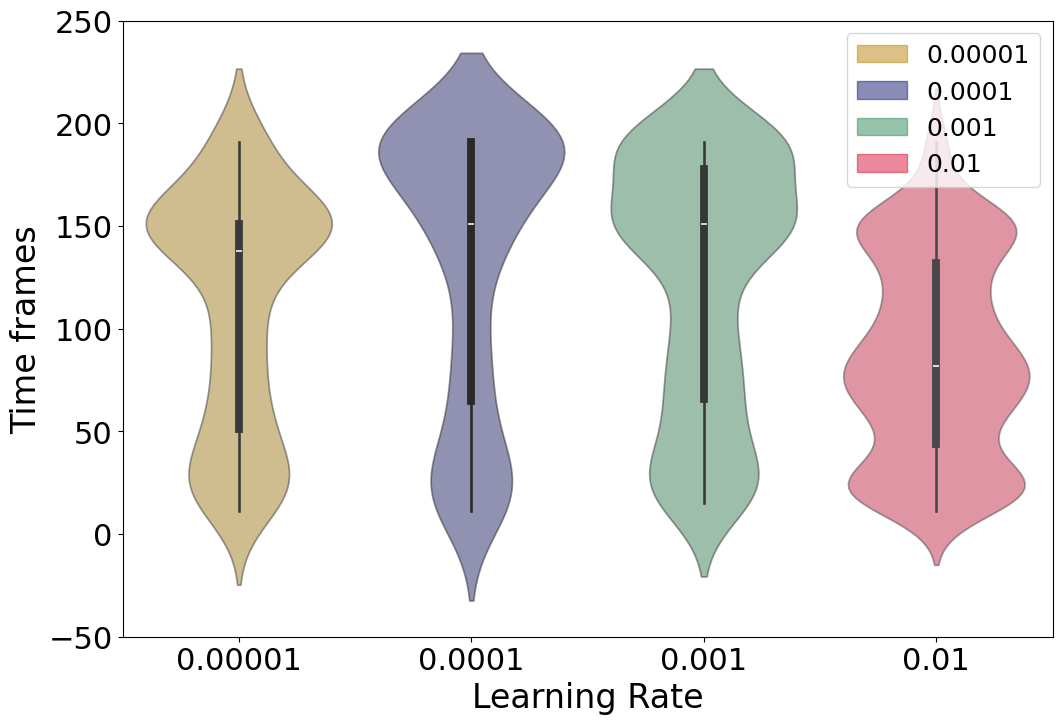

In [47]:
dataframes = [df_lr00001, df_lr0001, df_lr001, df_lr01]
colors = ['darkgoldenrod', 'midnightblue', 'seagreen', 'crimson']
positions = np.arange(len(dataframes))
labels = ['0.00001', '0.0001', '0.001', '0.01']

plt.figure(figsize=(12, 8))

# Plot each dataframe as a violin plot with its corresponding color
for i, (df, label) in enumerate(zip(dataframes, labels)):
    sns.violinplot(x=np.ones(len(df))*positions[i], y=df['time_frame_counter'], color=colors[i], alpha=0.5)

plt.xlabel('Learning Rate', fontsize=24)
plt.ylabel('Time frames', fontsize=24)
plt.xticks(range(len(dataframes)), labels, fontsize=22)
plt.yticks(fontsize=22)
plt.axhline(y=900, color='black', linestyle='--', lw=2)
plt.ylim(-50, 250)

legend_patches = [mpatches.Patch(color=color, label=label, alpha = 0.5) for label, color in zip(labels, colors)]
plt.legend(handles=legend_patches, labels=labels, fontsize=18, loc='upper right')

plt.show()

# Influence of gas weight

Params:
- DQN
- Hidden layers 32,
- learning rate 0.0001
- gamma 0.99
- epsilon 1.0
- epsilon decay 0.995
- batch size 64
- network update frequency 1
- sync freq 100
- convolutional network [[(4, 32, (8, 8), (4, 4)), (32, 64, (4, 4), (2, 2)), (64, 32, (2, 2), (1, 1))]]
- gas 1, 2, 4

In [6]:
path_5 = r"/home/docker/car_racing/models/DQN_7"
path_6 = r"/home/docker/car_racing/models/DQN_8"

In [7]:
file_gas2 = os.path.join(path_5, "2024-03-31 155749.388486_DQN_training_results.json")
file_gas1 = os.path.join(path_6, "2024-04-01 073114.849473_DQN_training_results.json")

with open(file_gas2, "r") as f:
    data_gas2 = json.load(f)
with open(file_gas1, "r") as f:
    data_gas1 = json.load(f)

In [8]:
data_gas2 = convert_data(data_gas2)
df_gas2 = pd.DataFrame(data_gas2)
data_gas1 = convert_data(data_gas1)
df_gas1 = pd.DataFrame(data_gas1)

In [9]:
df_gas2 = df_gas2[keep_cols]
df_gas1 = df_gas1[keep_cols]

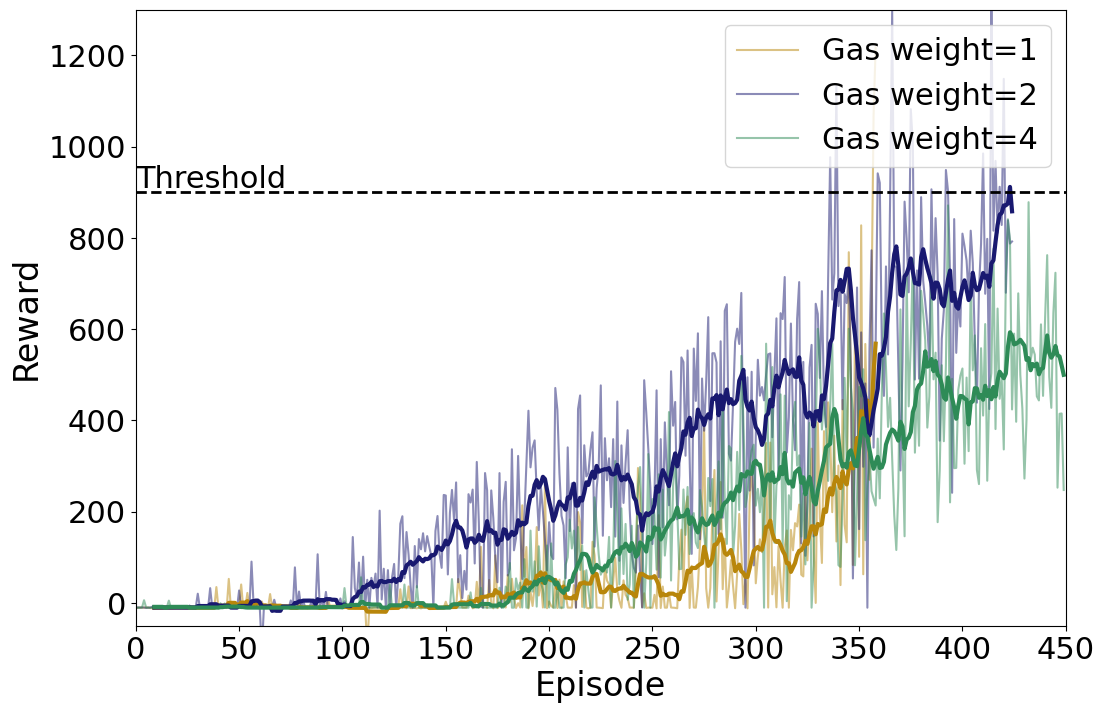

In [27]:
plt.figure(figsize=(12, 8))
plt.plot(df_lr00001['episode_reward'], label='Gas weight=1', color='darkgoldenrod', alpha=0.5)
plt.plot(df_gas2['episode_reward'], label='Gas weight=2', color='midnightblue', alpha=0.5)
plt.plot(df_gas1['episode_reward'], label='Gas weight=4', color='seagreen', alpha=0.5)
plt.plot(df_lr00001['episode_reward'].rolling(window=10).mean(), color='darkgoldenrod', lw=3)
plt.plot(df_gas2['episode_reward'].rolling(window=10).mean(), color='midnightblue', lw=3)
plt.plot(df_gas1['episode_reward'].rolling(window=10).mean(), color='seagreen', lw=3)
plt.xlabel('Episode', fontsize=24)
plt.ylabel('Reward', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=22, loc='upper right')
plt.axhline(y=900, color='black', linestyle='--', lw=2)
plt.text(0, 910, 'Threshold', fontsize=22, color='black')
plt.xlim(0, 450)
plt.ylim(-50, 1300)

plt.show()

In [54]:
df_gas1.describe()

,epsilon,time_frame_counter,episode_reward,average_rewards,loss_evolution
count,450.000000,450.000000,450.000000,450.000000,450.000000
mean,0.397864,150.746667,169.814688,114.460708,7.535957
std,0.249348,49.894658,217.535436,152.220737,5.481825
min,0.105333,22.000000,-10.500000,-10.421815,1.079125
25%,0.184894,116.000000,-10.182239,-8.509245,2.820172
50%,0.324551,176.500000,73.630184,24.307057,5.953256
75%,0.569694,191.000000,305.066879,235.257983,11.405575
max,1.000000,191.000000,878.180077,464.110292,21.715612


In [55]:
df_gas2.describe()

,epsilon,time_frame_counter,episode_reward,average_rewards,loss_evolution
count,425.000000,425.000000,425.000000,425.000000,425.000000
mean,0.414683,161.494118,287.968444,202.976731,7.311087
std,0.246446,48.596583,296.216792,210.253983,5.521765
min,0.119395,20.000000,-103.874436,-10.258969,0.943136
25%,0.203114,151.000000,2.839416,-2.951290,3.567394
50%,0.345536,191.000000,204.597087,149.908390,5.274538
75%,0.587823,191.000000,507.659864,366.182316,10.368516
max,1.000000,191.000000,1326.333333,668.590077,25.613676


In [56]:
df_lr00001.describe()

,epsilon,time_frame_counter,episode_reward,average_rewards,loss_evolution
count,359.000000,359.000000,359.000000,359.000000,359.000000
mean,0.464969,110.473538,58.399725,20.561555,2.742282
std,0.235735,57.801227,149.539532,41.917933,1.714265
min,0.166212,11.000000,-94.130120,-11.823944,0.961925
25%,0.260315,51.000000,-10.500000,-8.430043,1.238037
50%,0.407691,138.000000,-10.099010,-4.442451,2.329827
75%,0.638509,151.000000,53.048999,37.133218,3.836478
max,1.000000,191.000000,1217.633452,191.162001,9.223064


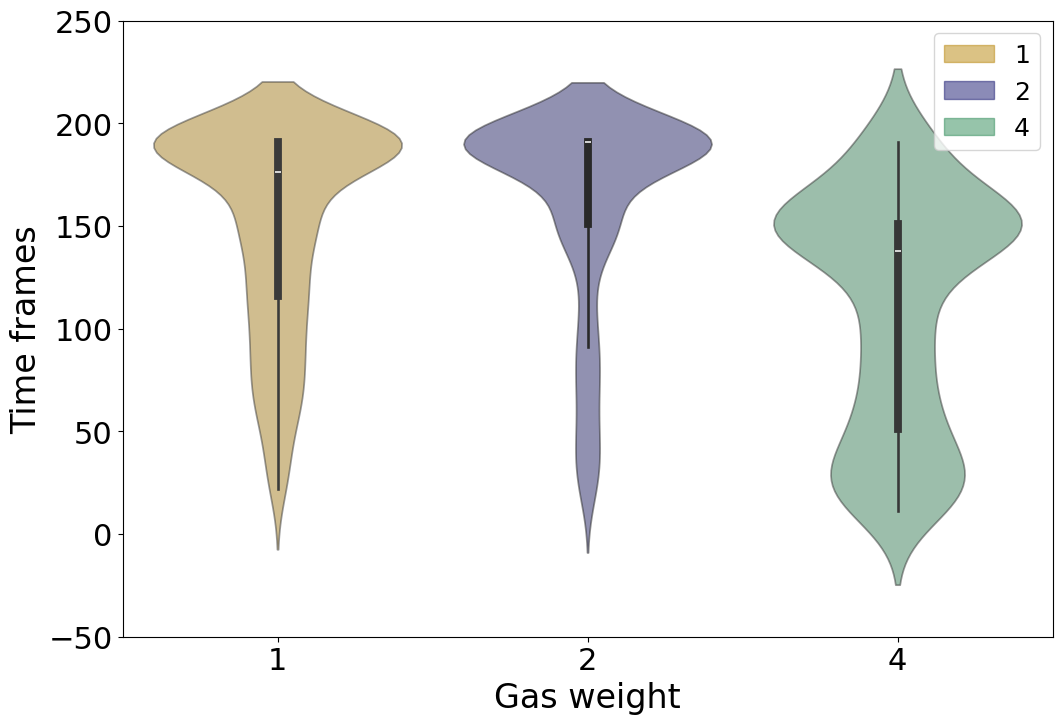

In [53]:
dataframes = [df_gas1, df_gas2, df_lr00001]
colors = ['darkgoldenrod', 'midnightblue', 'seagreen']
positions = np.arange(len(dataframes))
labels = ['1', '2', '4']

plt.figure(figsize=(12, 8))

# Plot each dataframe as a violin plot with its corresponding color
for i, (df, label) in enumerate(zip(dataframes, labels)):
    sns.violinplot(x=np.ones(len(df))*positions[i], y=df['time_frame_counter'], color=colors[i], alpha=0.5)

plt.xlabel('Gas weight', fontsize=24)
plt.ylabel('Time frames', fontsize=24)
plt.xticks(range(len(dataframes)), labels, fontsize=22)
plt.yticks(fontsize=22)
plt.axhline(y=900, color='black', linestyle='--', lw=2)
plt.ylim(-50, 250)

legend_patches = [mpatches.Patch(color=color, label=label, alpha = 0.5) for label, color in zip(labels, colors)]
plt.legend(handles=legend_patches, labels=labels, fontsize=18, loc='upper right')

plt.show()